<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

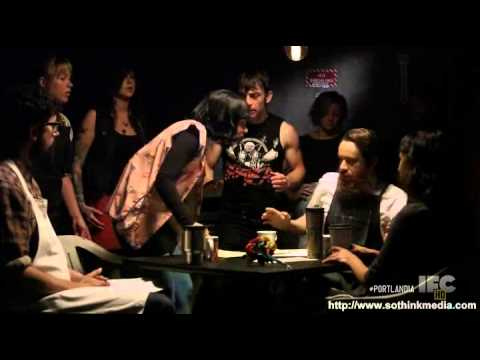

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
#put text review in tokens variables
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops['full_review_text'].value_counts(5)


 10/16/2016 amazing coffee! waffle banana and nutella is incredible! beautiful place! the service is great! everything is just perfect!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [4]:
""" 
import 
"""
#base
from collections import Counter
import re

import pandas as pd

#plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

#NLP libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [5]:
shops.head(4)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in listed in brunch spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 very cool decor! good drinks nice ...,2.0 star rating


In [6]:
def tokenize(text):
    """
    Parses a str to a list of semantic units
    
    args:
        text(str): The string that the function will tokenize.
    
    returns:
        list: tokensparsed out by the mechanics of your choice
    """
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [7]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 listed in date night: austin, ambia...",4.0 star rating


In [8]:
shops['full_review_text'].value_counts(normalize=True)[:50]

 10/16/2016 amazing coffee! waffle banana and nutella is incredible! beautiful place! the service is great! everything is just perfect!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
shops['token'] = shops['full_review_text'].apply(tokenize)

In [10]:
shops['token'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: token, dtype: object

In [11]:
#object from Base python
from collections import Counter

#object counter takes an iterable, but you can instaniate an empty one and update itl
word_counts = Counter()

#update it based on a split of each of our docs
shops['token'].apply(lambda x: word_counts.update(x))

#print most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [12]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [13]:
wc = count(shops['token'])

In [14]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
60,the,6847,34809,1.0,0.044537,0.044537,0.899028
25,and,6864,26650,2.0,0.034098,0.078634,0.901261
73,a,6246,22755,3.0,0.029114,0.107748,0.820116
39,i,5528,20237,4.0,0.025892,0.133641,0.725840
62,to,5653,17164,5.0,0.021961,0.155601,0.742253


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


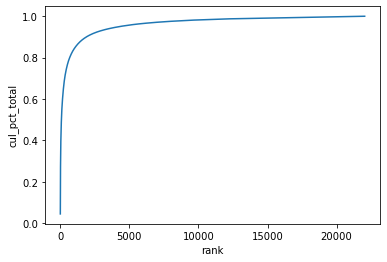

In [15]:
import seaborn as sns

#cumulative dist plot
sns.lineplot(x='rank', y='cul_pct_total', data = wc);

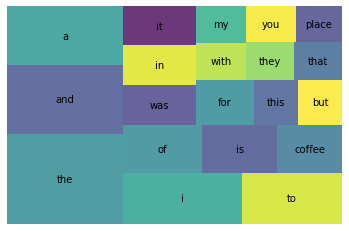

In [16]:
import squarify
import matplotlib.pyplot as plt
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label = wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [17]:
import spacy
from spacy.tokenizer import Tokenizer

nlp=spacy.load('en_core_web_lg')

#tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [18]:
shops['token'].head(5)

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: token, dtype: object

In [19]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [20]:
wc = count(shops['tokens'])

In [21]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
61,the,6847,34649,1.0,0.042825,0.042825,0.899028
30,and,6853,26442,2.0,0.032681,0.075506,0.899816
75,a,6240,22657,3.0,0.028003,0.103509,0.819328
14,,7616,22606,4.0,0.027940,0.131449,1.000000
44,i,5511,19990,5.0,0.024707,0.156156,0.723608


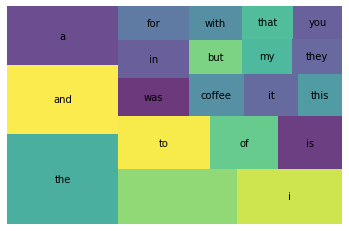

In [22]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [23]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [24]:
shops.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

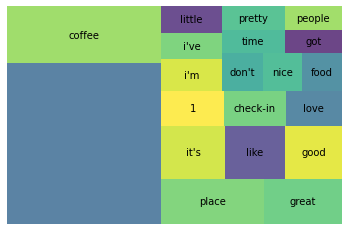

In [25]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [26]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'coffee', '-'])

In [27]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [28]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
9,,7616,22606,1.0,0.054382,0.054382,1.000000
148,place,3029,4264,2.0,0.010258,0.064640,0.397715
77,great,2438,3250,3.0,0.007818,0.072458,0.320116
253,it's,2061,3117,4.0,0.007498,0.079956,0.270614
175,like,2034,2902,5.0,0.006981,0.086937,0.267069


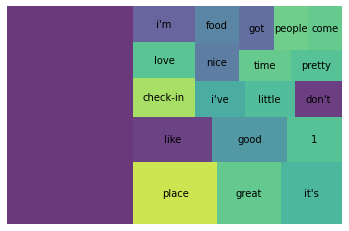

In [29]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

